# Project Description

The following calculates the Sharpe Ratio for the stocks of Amazon and Facebook. As a benchmark, the S&P 500 will be used as a benchmark; it measures the performance of the 500 largest stocks in the U.S.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [62]:
stock_data = pd.read_csv('../Risk_Return_The_Sharpe_Ratio/stock_data.csv', parse_dates=['Date'], index_col='Date')
stock_data.head()

,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


In [64]:
benchmark_data = pd.read_csv('../Risk_Return_The_Sharpe_Ratio/benchmark_data.csv', parse_dates=['Date'], index_col='Date')
benchmark_data.head()

,S&P 500
Date,
2016-01-01,NaN
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09


# Data Wrangling

In [65]:
print('Stock Data\n')
stock_data.info()



Stock Data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [67]:
print('Benchmark\n')
benchmark_data.info()

Benchmark

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2016-01-01 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Stock Data



,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


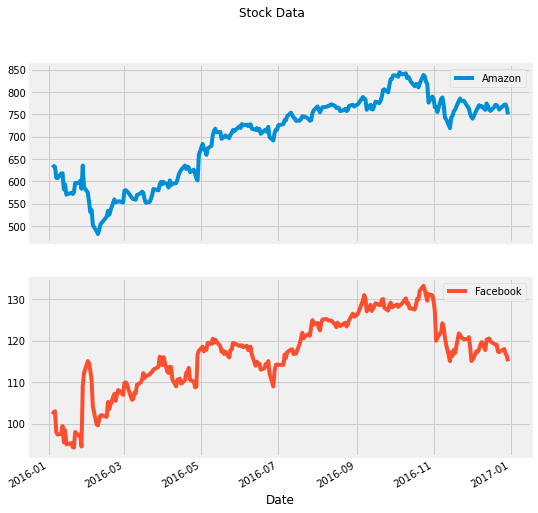

In [79]:
print('Stock Data\n')

stock_data.plot(subplots=True, figsize=(8,8), title='Stock Data')
stock_data.describe()

benchmark_data



,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


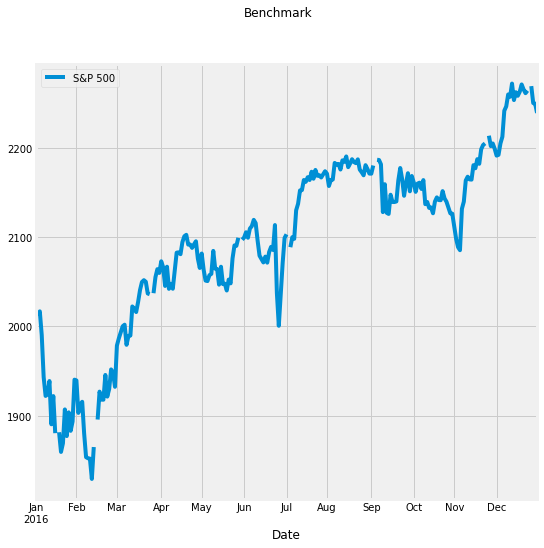

In [80]:
print('benchmark_data\n')
benchmark_data.plot(subplots=True, figsize=(8,8), title='Benchmark')
benchmark_data.describe()

In [71]:
print('Stock Data\n')
stock_data.shape

Stock Data



(252, 2)

In [73]:
print('Benchmark\n')
benchmark_data.shape

Benchmark



(261, 1)

In [74]:
print('Stock Data\n')
list(stock_data.columns)

Stock Data



['Amazon', 'Facebook']

In [76]:
print('Benchmark\n')
list(benchmark_data.columns)

Benchmark



['S&P 500']

# Data Cleaning

In [81]:
print('Stock Data\n')
stock_data.isnull().sum()

Stock Data



Amazon      0
Facebook    0
dtype: int64

In [83]:
print('Benchmark\n')
benchmark_data.isnull().sum()

Benchmark



S&P 500    9
dtype: int64

In [84]:
benchmark_data.dropna(inplace = True)

In [85]:
print('Benchmark\n')
benchmark_data.isnull().sum()

Benchmark



S&P 500    0
dtype: int64

In [86]:
print('Stock Data\n')
stock_data.duplicated().sum()

Stock Data



0

In [90]:
print('Benchmark\n')
benchmark_data.duplicated().sum()

Benchmark



1

In [91]:
benchmark_data.drop_duplicates(inplace=True)

In [92]:
benchmark_data.duplicated().sum()

0

# EDA

### The inputs for the Sharpe Ratio: Starting with Daily Stock Returns

We already have the investment data, and not the return. To get the return data we need to calculate first the percentage change from one day to the next concerning the stocks. Here we use the function .pct_change() 

Stock Returns



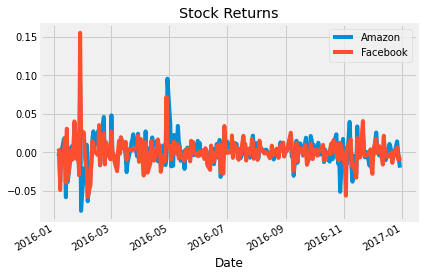

In [100]:
print('Stock Returns\n')

stock_returns = stock_data.pct_change()
stock_returns.describe()
stock_returns.plot(title='Stock Returns');

### Daily S&P 500 returns


S&P 500 Returns


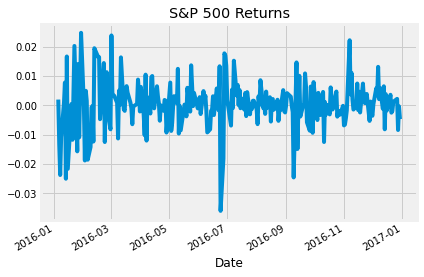

In [101]:
print('S&P 500 Returns')

sp_returns = benchmark_data['S&P 500'].pct_change()
sp_returns.describe()
sp_returns.plot(title='S&P 500 Returns');

### Calculating Excess Returns for Amazon and Facebook vs. S&P 500

Next, we need to calculate the relative performance of the stocks vs the benchmark of S&P 500. This is calculated through getting the difference in returns between the stock and S&P returns for each day

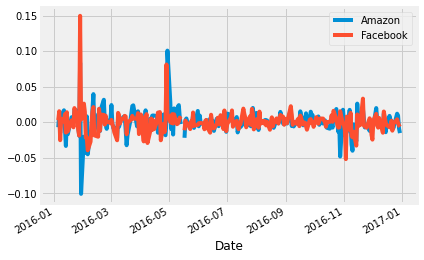

In [105]:
excess_returns = stock_returns.sub(sp_returns, axis=0)
excess_returns.describe()
excess_returns.plot();

### The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500

Now we need to get the average and standarad diviation of the Excess returns

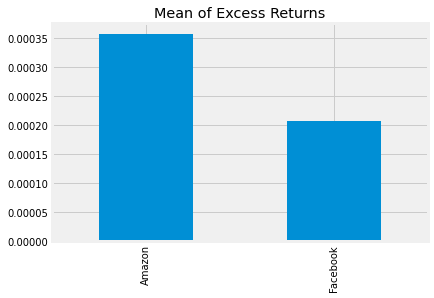

In [112]:
avg_excess_returns = excess_returns.mean()
avg_excess_returns.plot(kind='bar', title='Mean of Excess Returns');

### The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference

Standard deviation will show us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500

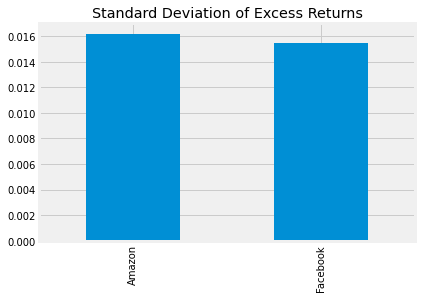

In [114]:
sd_excess_returns = excess_returns.std()
sd_excess_returns.plot(kind='bar',title='Standard Deviation of Excess Returns');

### Putting it all together

To calculate the Sharpe Ratio, we'll first compute the average and the mean by divdision to get the daily ratio. Then we will multiply it by sqrt 252 because the Sharpe Ratio is annualized; we have 252 trading days.

In [115]:
daily_ratio = avg_excess_returns.div(sd_excess_returns)
annual_factor = np.sqrt(252)


In [120]:
annual_sharpe_ratio = daily_ratio * annual_factor
print(annual_sharpe_ratio)

Amazon      0.350565
Facebook    0.212551
dtype: float64


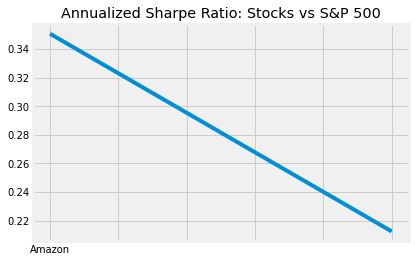

In [118]:
annual_sharpe_ratio.plot(title='Annualized Sharpe Ratio: Stocks vs S&P 500');

### Conclusion

Accordingly, it is better to invest in Amazon more than FB. The daily returns of Amazon is seen to be as twice as FB. This means it is as well twice the returns of S&P 500. The risk of choosing Amazon over FB according to the standard deviation was slightly higher and this was because the daily returns is higher.

In [122]:
buy_amazon= True
